In [17]:
import os
import tensorflow as tf
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Train\\Healthy"
train_files_powdery = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Train\\Powdery"
train_files_rust = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Train\\Rust"

test_files_healthy = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Test\\Healthy"
test_files_powdery = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Test\\Powdery"
test_files_rust = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Test\\Rust"

valid_files_healthy = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Validation\\Healthy"
valid_files_powdery = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Validation\\Powdery"
valid_files_rust = "C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Validation\\Rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 458
Number of powder leaf images in training set 430
Number of rusty leaf images in training set 434
Number of healthy leaf images in test set 50
Number of powder leaf images in test set 50
Number of rusty leaf images in test set 50
Number of healthy leaf images in validation set 20
Number of powder leaf images in validation set 20
Number of rusty leaf images in validation set 20


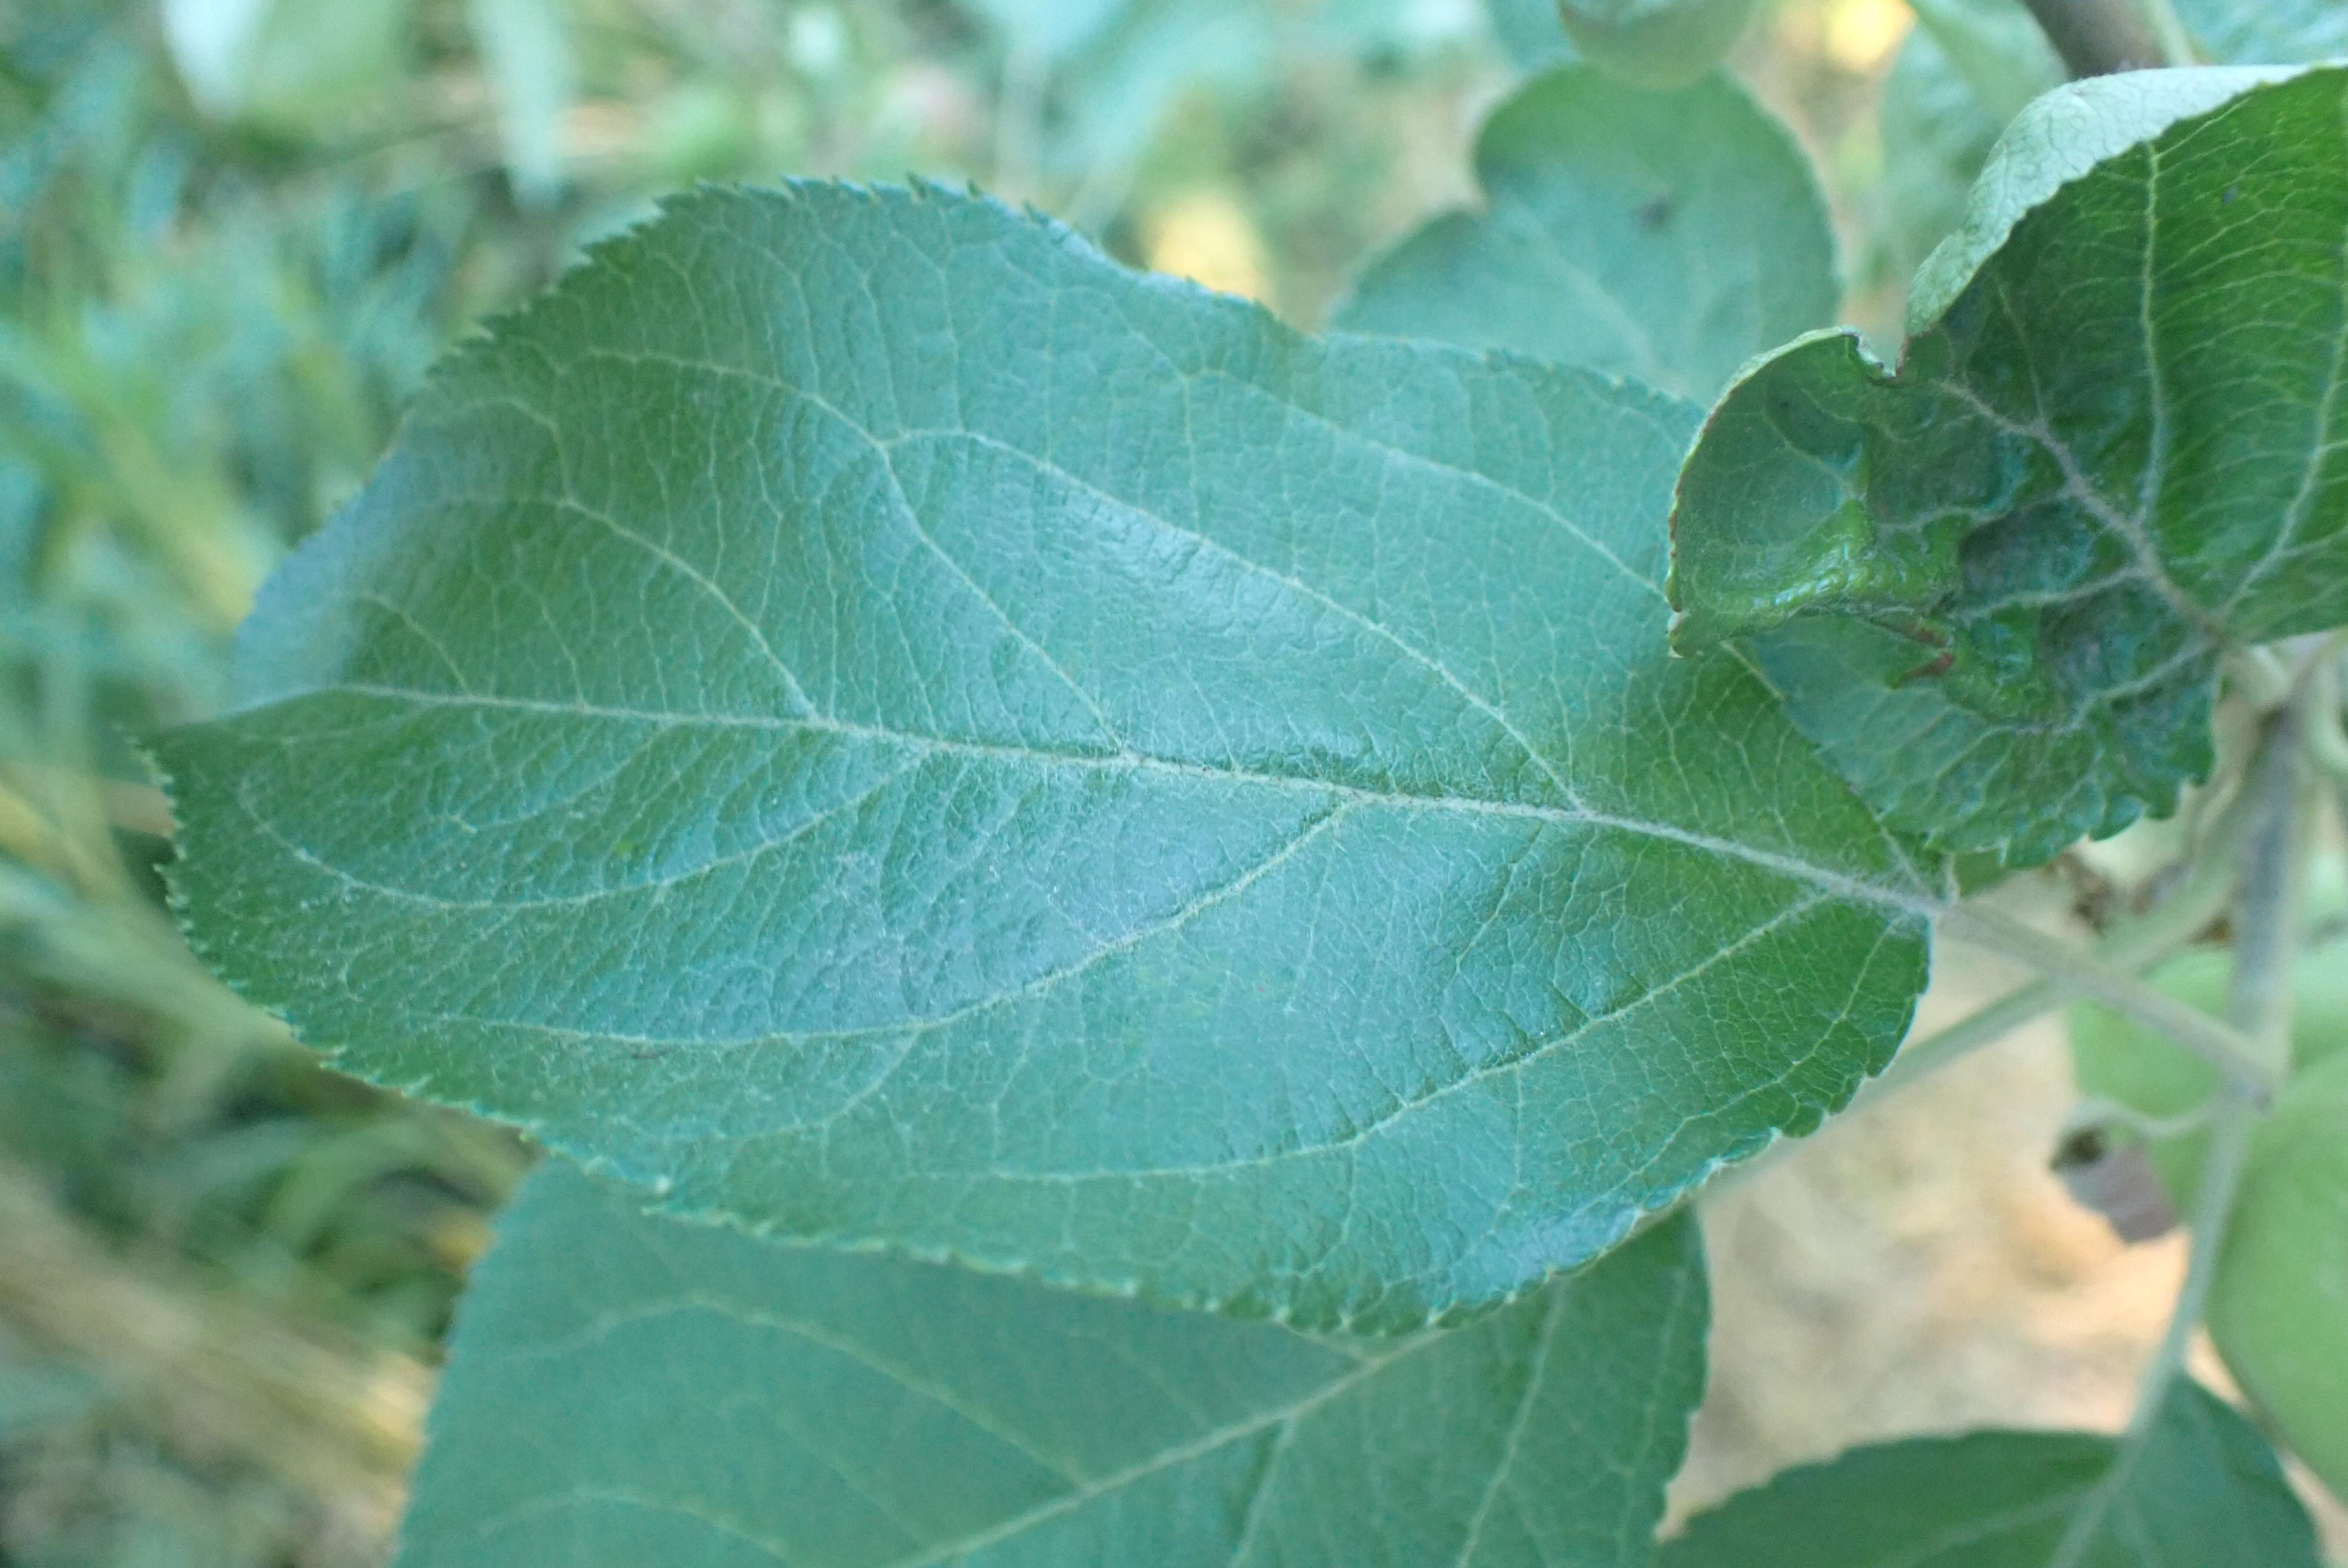

In [18]:
from PIL import Image
import IPython.display as display

image_path = 'C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Test\\Healthy\\8ddaa5a5caa5caa8.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

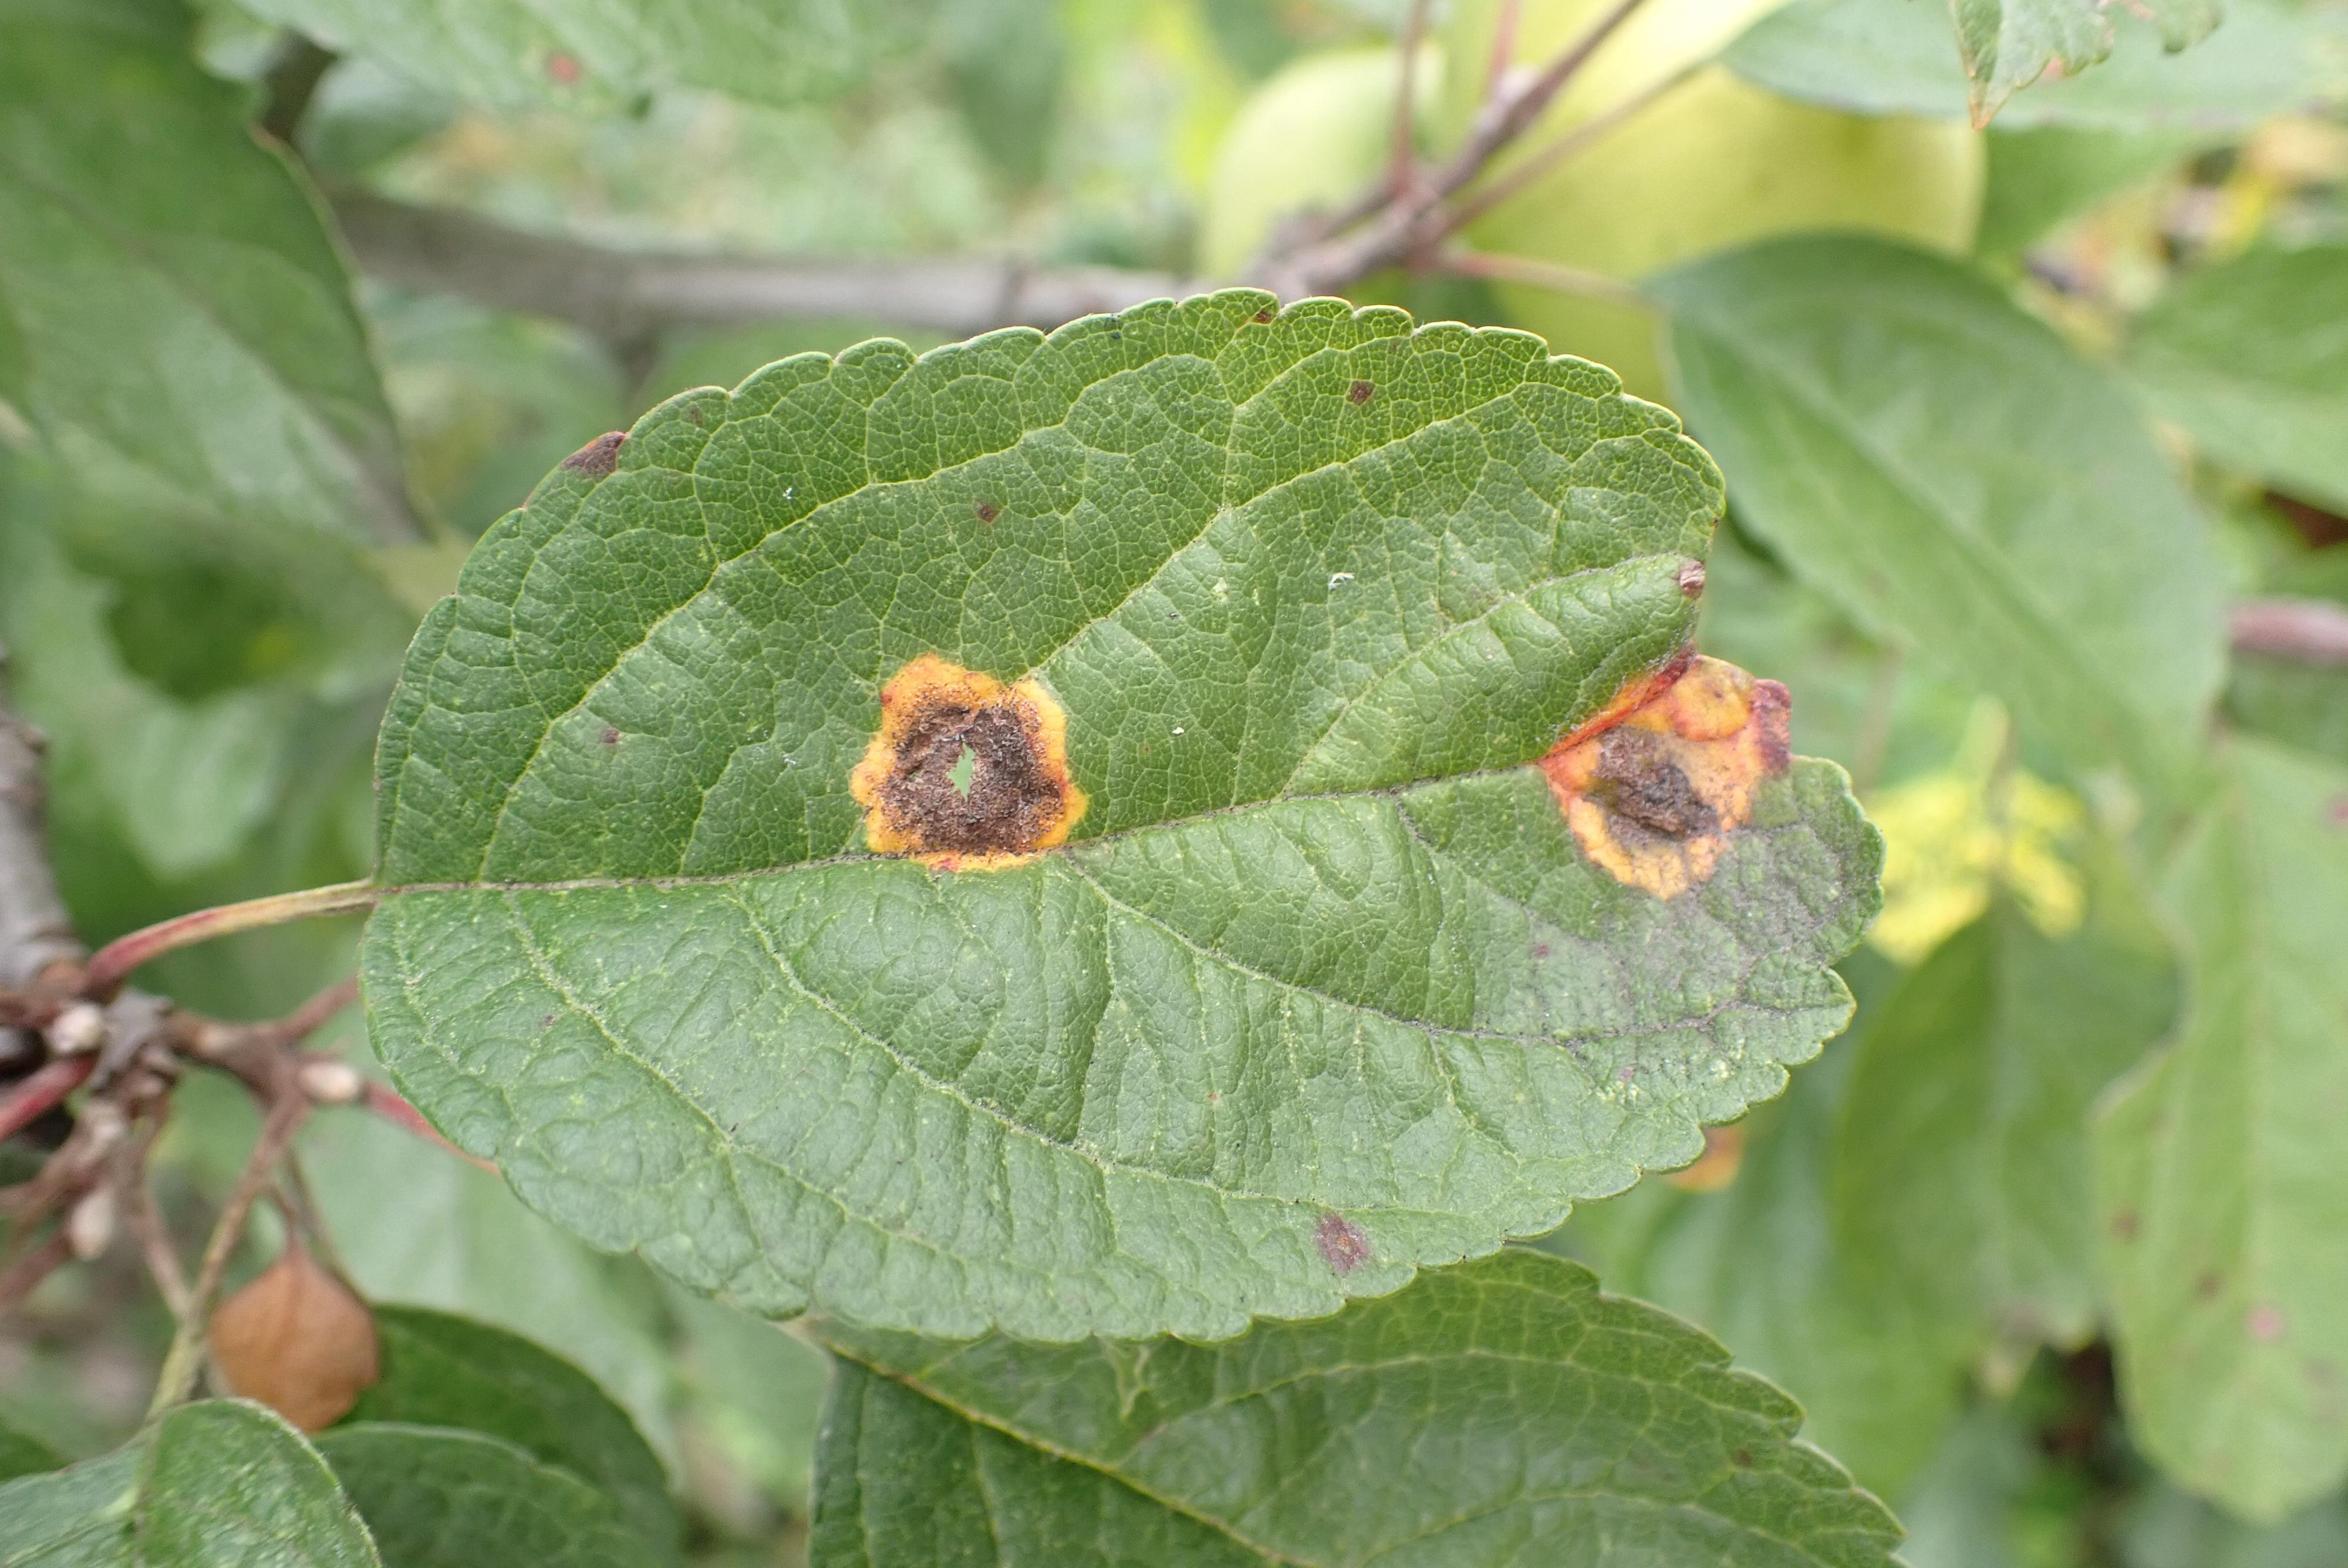

In [19]:
image_path = 'C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Train\\Rust\\8a954b82bf81f2bc.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory('C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
42/42 [==============================] - 161s 4s/step - loss: 1.6097 - accuracy: 0.4607 - val_loss: 0.7819 - val_accuracy: 0.6500
Epoch 2/5
42/42 [==============================] - 153s 4s/step - loss: 0.7026 - accuracy: 0.7035 - val_loss: 0.7586 - val_accuracy: 0.6333
Epoch 3/5
42/42 [==============================] - 150s 4s/step - loss: 0.5964 - accuracy: 0.7307 - val_loss: 0.8303 - val_accuracy: 0.6333
Epoch 4/5
42/42 [==============================] - 150s 4s/step - loss: 0.4998 - accuracy: 0.7950 - val_loss: 0.5254 - val_accuracy: 0.8000
Epoch 5/5
42/42 [==============================] - 155s 4s/step - loss: 0.4565 - accuracy: 0.8313 - val_loss: 0.4636 - val_accuracy: 0.8500


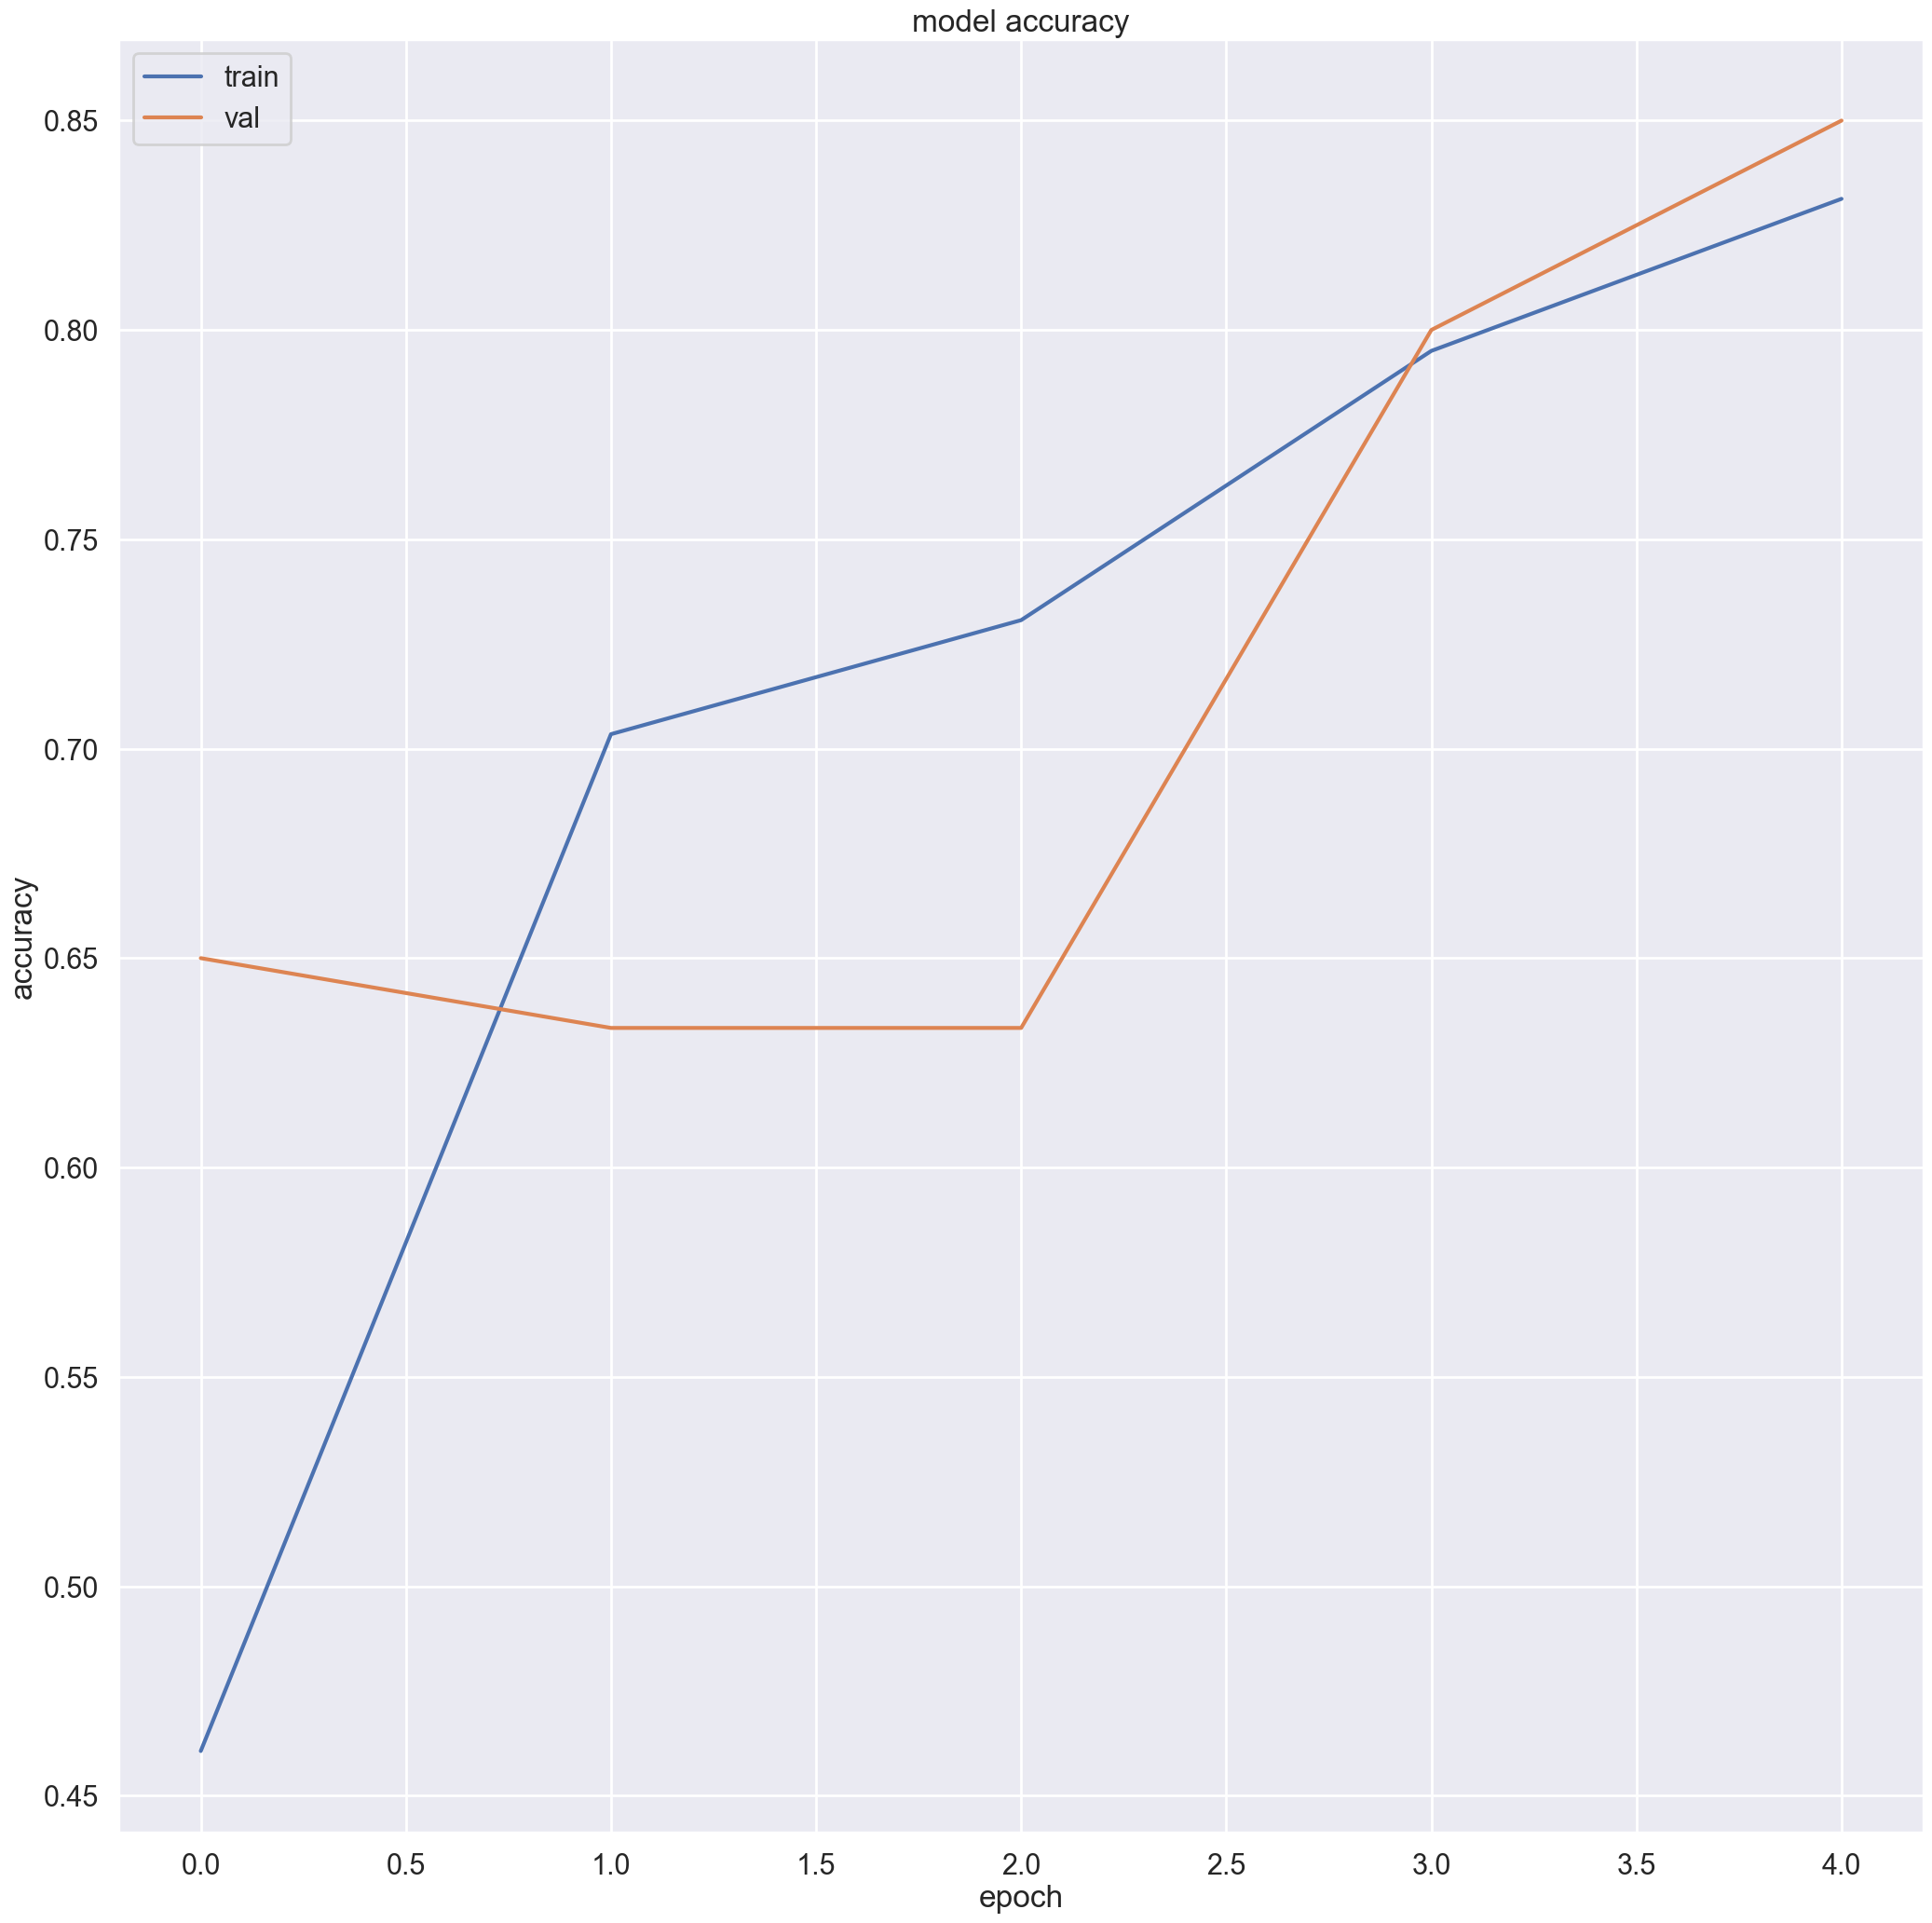

In [25]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
model.save("model.h5")

In [27]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('C:\\Users\\sssan\\OneDrive\\Desktop\\Plant Disease\\plant_disease_detection-main\\Test\\Rust\\82f49a4a7b9585f1.jpg')

In [28]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 209ms/step


array([5.032623e-02, 6.209344e-05, 9.496116e-01], dtype=float32)

In [29]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [30]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
